In [1]:
#Task is to build a model capable of predicting the cirrhosis stage
#credit to kaggle for the dataset

In [2]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize']=(15,10)
%matplotlib inline

In [13]:
#loading the dataset
df=pd.read_csv('C:\\Users\sojore\Downloads\EDITS\cirrhosis Prediction\cirrhosis.csv')
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


In [14]:
#exploring the dataset
df.groupby('Drug')['Drug'].agg('count')

Drug
D-penicillamine    158
Placebo            154
Name: Drug, dtype: int64

In [15]:
df.shape

(418, 20)

In [16]:
#handling missing values
df.isna().sum()

ID                 0
N_Days             0
Status             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
dtype: int64

In [17]:
df.sample(3)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.1,55.0,151.0,12.0,4.0
384,385,1635,C,NaN,20089,F,NaN,NaN,NaN,N,0.7,NaN,2.93,NaN,NaN,NaN,NaN,209.0,10.6,3.0
196,197,2365,C,D-penicillamine,16300,F,N,N,N,N,0.6,266.0,3.97,25.0,1164.0,102.3,102.0,201.0,10.1,2.0


In [22]:
df.Drug.mode()[0]

'D-penicillamine'

In [24]:
df.Drug=df.Drug.fillna(df.Drug.mode()[0])
df.Drug.isna().any()

False

In [26]:
df.Ascites.mode()[0]

'N'

In [27]:
df.Ascites=df.Ascites.fillna(df.Ascites.mode()[0])
df.Ascites.isna().any()

False

In [46]:
df.Hepatomegaly=df.Hepatomegaly.fillna(df.Hepatomegaly.mode()[0])
df.Spiders=df.Spiders.fillna(df.Spiders.mode()[0])
df.Cholesterol=df.Cholesterol.fillna(df.Cholesterol.mode()[1])
df.Copper=df.Copper.fillna(df.Copper.mode()[0])
df.Alk_Phos=df.Alk_Phos.fillna(df.Alk_Phos.mode()[0])
df.SGOT=df.SGOT.fillna(df.SGOT.mode()[0])
df.Tryglicerides=df.Tryglicerides.fillna(df.Tryglicerides.mode()[0])
df.Platelets=df.Platelets.fillna(df.Platelets.mode()[0])
df.Prothrombin=df.Prothrombin.fillna(df.Prothrombin.mode()[0])
df.Stage=df.Stage.fillna(df.Stage.mode()[0])

In [47]:
df.isnull().any()

ID               False
N_Days           False
Status           False
Drug             False
Age              False
Sex              False
Ascites          False
Hepatomegaly     False
Spiders          False
Edema            False
Bilirubin        False
Cholesterol      False
Albumin          False
Copper           False
Alk_Phos         False
SGOT             False
Tryglicerides    False
Platelets        False
Prothrombin      False
Stage            False
dtype: bool

In [48]:
#no more missing values baby
df.head()

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0
2,3,1012,D,D-penicillamine,25594,M,N,N,N,S,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,4,1925,D,D-penicillamine,19994,F,N,Y,Y,S,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0
4,5,1504,CL,Placebo,13918,F,N,Y,Y,N,3.4,279.0,3.53,143.0,671.0,113.15,72.0,136.0,10.9,3.0


<function matplotlib.pyplot.show(close=None, block=None)>

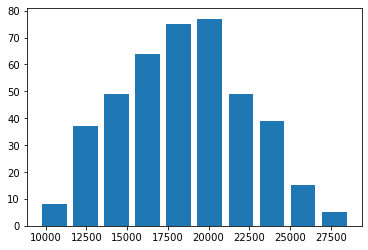

In [49]:
#plotting some data for better visualization
plt.hist(df.Age,rwidth=0.8)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

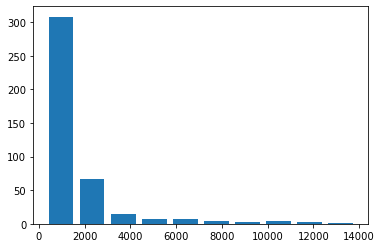

In [50]:
plt.hist(df.Alk_Phos,rwidth=0.8)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

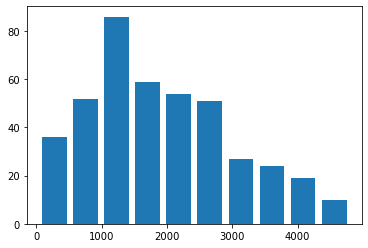

In [53]:
plt.hist(df.N_Days,rwidth=0.8)
plt.show

In [52]:
#handling the outliers
df.head(2)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
1,2,4500,C,D-penicillamine,20617,F,N,Y,Y,N,1.1,302.0,4.14,54.0,7394.8,113.52,88.0,221.0,10.6,3.0


In [55]:
df1=df.copy() #perfoming deep copy
ll1=df.N_Days.quantile(0.01)
ul1=df.N_Days.quantile(0.99)
df1[(df1.N_Days<=ll1) | (df1.N_Days>=ul1)]
df2=df1[(df1.N_Days>ll1) & (df1.N_Days<ul1)]
df2.shape

(408, 20)

In [57]:
ll2=df2.Age.quantile(0.01)
ul2=df2.Age.quantile(0.99)
df2[(df.Age<=ll2)| (df2.Age>=ul2)]
df3=df2[(df2.Age>ll2) & (df2.Age<ul2)]
df3.shape

<ipython-input-57-7d858d3237e7>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df2[(df.Age<=ll2)| (df2.Age>=ul2)]


(398, 20)

In [59]:
ll3=df3.Bilirubin.quantile(0.01)
ul3=df3.Bilirubin.quantile(0.99)
df3[(df3.Bilirubin<=ll3) |(df3.Bilirubin>=ul3)]
df4=df3[(df3.Bilirubin>ll3) & (df3.Bilirubin<ul3)]
df4.shape

(381, 20)

In [61]:
ll4=df4.Cholesterol.quantile(0.01)
ul4=df4.Cholesterol.quantile(0.99)
df4[(df4.Cholesterol<=ll4) | (df4.Cholesterol>=ul4)]
df5=df4[(df4.Cholesterol>ll4) & (df4.Cholesterol<ul4)]
df5.shape

(373, 20)

In [62]:
df5.head(1)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,D-penicillamine,21464,F,Y,Y,Y,Y,14.5,261.0,2.6,156.0,1718.0,137.95,172.0,190.0,12.2,4.0


In [64]:
ll5=df5.Albumin.quantile(0.01)
ul5=df5.Albumin.quantile(0.99)
df5[(df5.Albumin<=ll5) | (df5.Albumin>=ul5)]
df6=df5[(df5.Albumin>ll5) & (df5.Albumin<ul5)]
df6.shape

(365, 20)

In [69]:
ll6=df6.Copper.quantile(0.01)
ul6=df6.Copper.quantile(0.99)
df6[(df6.Copper<=ll6) | (df6.Copper>=ul6)]
df7=df6[(df6.Copper>ll6) & (df6.Copper<ul6)]
df7.shape

(357, 20)

In [71]:
ll7=df7.Alk_Phos.quantile(0.01)
ul7=df7.Alk_Phos.quantile(0.99)
df7[(df7.Alk_Phos<=ll7) | (df7.Alk_Phos>=ul7)]
df8=df7[(df7.Alk_Phos>ll7) & (df7.Alk_Phos<ul7)]
df8.shape

(349, 20)

In [73]:
ll8=df8.SGOT.quantile(0.01)
ul8=df8.SGOT.quantile(0.99)
df8[(df8.SGOT<=ll8) | (df8.SGOT>=ul8)]
df9=df8[(df8.SGOT>ll8) & (df8.SGOT<ul8)]
df9.shape

(341, 20)

In [75]:
ll9=df9.Tryglicerides.quantile(0.01)
ul9=df9.Tryglicerides.quantile(0.99)
df9[(df9.Tryglicerides<=ll9) | (df9.Tryglicerides>=ul9)]
df10=df9[(df9.Tryglicerides>ll9) & (df9.Tryglicerides<ul9)]
df10.shape

(333, 20)

In [77]:
ll10=df10.Platelets.quantile(0.01)
ul10=df10.Platelets.quantile(0.99)
df10[(df10.Platelets<=ll10) | (df10.Platelets>=ul10)]
df11=df10[(df10.Platelets>ll10) & (df10.Platelets<ul10)]
df11.shape

(325, 20)

In [79]:
ll11=df11.Prothrombin.quantile(0.01)
ul11=df11.Prothrombin.quantile(0.99)
df11[(df11.Prothrombin<=ll11) | (df11.Prothrombin>=ul11)]
df12=df11[(df11.Prothrombin>ll11) & (df11.Prothrombin<ul11)]
df12.shape

(317, 20)

<function matplotlib.pyplot.show(close=None, block=None)>

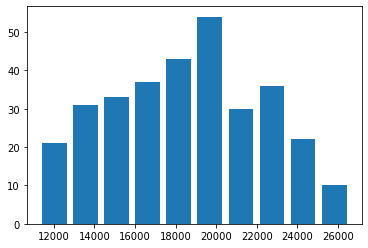

In [80]:
plt.hist(df12.Age,rwidth=0.8)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

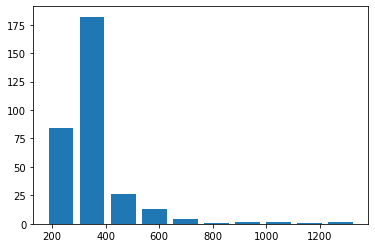

In [82]:
plt.hist(df12.Cholesterol,rwidth=0.8)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

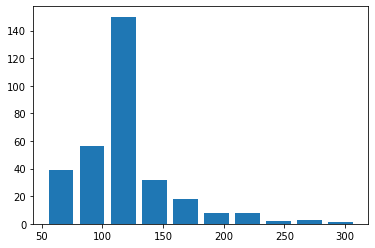

In [83]:
plt.hist(df12.Tryglicerides,rwidth=0.8)
plt.show

In [84]:
#the above plots kinda of a normal distribution which is pretty good
#next up converting the categorical columns into numerical columns

In [85]:
df12.sample(2)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
47,48,4427,C,Placebo,17947,M,N,N,N,N,1.9,259.0,3.70,281.0,10396.8,188.34,178.0,214.0,11.0,3.0
410,411,1119,C,D-penicillamine,18628,F,N,Y,N,N,0.6,316.0,3.57,52.0,559.0,71.30,118.0,286.0,10.6,3.0


In [97]:
df11.Edema.unique()

array(['Y', 'S', 'N'], dtype=object)

In [102]:
df12=df12.replace(['M','F'],[1,0])
df12=df12.replace(['N','Y'],[1,0])
df12=df12.replace(['S'],[2])
df12=df12.replace(['D-penicillamine', 'Placebo'],[1,0])
df12.head(2)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,1,400,D,1,21464,0,0,0,0,0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,3,1012,D,1,25594,1,1,1,1,2,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0


In [99]:
df12.Edema.unique()

array([0, 2, 1], dtype=int64)

In [104]:
df12.Status.unique()

array(['D', 'CL', 'C'], dtype=object)

In [112]:
from sklearn.preprocessing import LabelEncoder
le_status=LabelEncoder()
df12.Status=le_status.fit_transform(df12.Status)
df12.sample(5)

,ID,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
25,26,1444,2,0,19002,0,1,0,0,1,5.2,1128.0,3.68,53.0,3228.0,165.85,166.0,421.0,9.9,3.0
137,138,1297,2,1,18719,1,1,0,1,1,7.3,426.0,3.93,262.0,2424.0,145.70,218.0,252.0,10.5,3.0
302,303,1250,0,0,22156,0,1,0,0,1,1.0,372.0,3.25,108.0,1190.0,140.00,55.0,248.0,10.6,4.0
327,328,2111,2,1,19724,0,1,0,1,1,1.0,316.0,3.60,52.0,559.0,71.30,118.0,344.0,12.1,2.0
29,30,321,2,0,15116,0,1,0,0,1,3.6,260.0,2.54,172.0,7277.0,121.26,158.0,124.0,11.0,4.0


In [113]:
#dropping unneccessary columns
df13=df12.drop(['ID','N_Days'],axis='columns')
df13.head(3)

,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2,1,21464,0,0,0,0,0,14.5,261.0,2.60,156.0,1718.0,137.95,172.0,190.0,12.2,4.0
2,2,1,25594,1,1,1,1,2,1.4,176.0,3.48,210.0,516.0,96.10,55.0,151.0,12.0,4.0
3,2,1,19994,0,1,0,0,2,1.8,244.0,2.54,64.0,6121.8,60.63,92.0,183.0,10.3,4.0


In [114]:
#preparing my training and testing dataset
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df13.drop('Stage',axis=1),df13.Stage,test_size=0.2,random_state=10)

In [115]:
X_train.shape

(253, 17)

In [116]:
len(X_test)

64

In [117]:
y_train[:5]

15     3.0
141    2.0
358    1.0
286    4.0
398    2.0
Name: Stage, dtype: float64

In [118]:
#using machine learning algorithms to build a model
##creating a machine learning model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit

In [119]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
def find_best_model_using_gridsearchcv(X,y):
    models={
        'linear_regression':{
            'model':LinearRegression(),
            'params':{
                'normalize':[True,False]
            }
        },
        'lasso':{
            'model':Lasso(),
            'params':{
                'alpha':[1,2],
                'selection':['random','cyclic']
            }
        },
        'decision_tree':{
            'model':DecisionTreeRegressor(),
            'params':{
                'criterion':['mse','friedman_mse'],
                'splitter':['best','random']
            }
        },
        'svm':{
            'model':SVC(),
            'params':{
                'C':[1,2,3],
                'kernel':['linear','rbf']
            }
        },
        'random_forest':{
            'model':RandomForestClassifier(),
            'params':{
                
            }
        },
        'logistic_regression':{
            'model':LogisticRegression(),
            'params':{}
        }
    }
#this is what we call hyper parameter tunning

    my_scores=[]
    cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=0)
    for model_name,config in models.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        my_scores.append({
            'model':model_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
    return pd.DataFrame(my_scores,columns=['model','best_score','best_params'])


In [121]:
#find_best_model_using_gridsearchcv(X_train,y_train)

In [134]:
lr=RandomForestClassifier()
lr.fit(X_train,y_train)

RandomForestClassifier()

In [135]:
lr.score(X_test,y_test)

0.453125

In [136]:
#from the above i can choose the best algorithm to create my model
#i will simply employ svm for my model creation
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [137]:
#let me get the score of the model
model.score(X_test,y_test)

0.5

In [138]:
#now i can use the model to do predictions
y_predicted=model.predict(X_test)
y_predicted[:10]

array([3., 4., 3., 4., 3., 3., 3., 4., 3., 3.])

In [139]:
y_test[:10]

412    3.0
390    2.0
285    3.0
241    3.0
98     2.0
2      4.0
411    3.0
381    4.0
401    3.0
372    2.0
Name: Stage, dtype: float64

Text(159.0, 0.5, 'Truth')

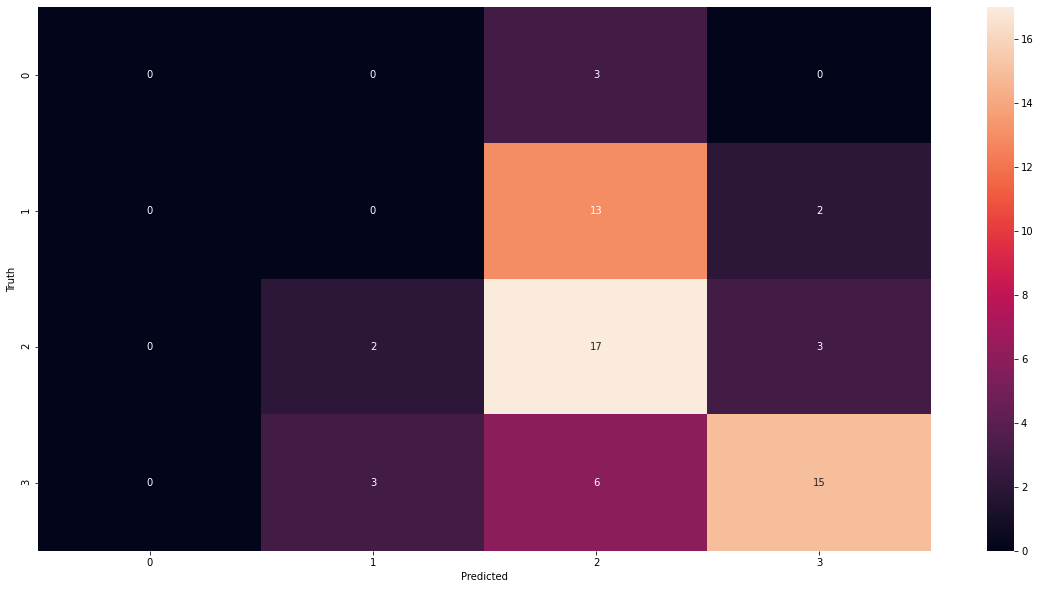

In [140]:
#next i will create a heatmap for a better visualization of the predicted results
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sn
cm=confusion_matrix(y_test,y_predicted)
plt.figure(figsize=(20,10))
sn.heatmap(cm,annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [141]:
#my model is doing pretty good on doing the predictions
#next i can print a classification report
print('Classification Report: \n',classification_report(y_test,y_predicted))

Classification Report: 
               precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         3
         2.0       0.00      0.00      0.00        15
         3.0       0.44      0.77      0.56        22
         4.0       0.75      0.62      0.68        24

    accuracy                           0.50        64
   macro avg       0.30      0.35      0.31        64
weighted avg       0.43      0.50      0.45        64



C:\Users\sojore\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#ways to improve the above models perfomance,perfom more feature engineering on the data